# PCA with Z-Scores

In [77]:
import os
os.chdir('/Users/ltran/Documents/TrueData29/CPC_ML_tutorial/')

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import random

from scipy.stats import fisher_exact
from pcntoolkit.normative import estimate, predict, evaluate
from pcntoolkit.util.utils import compute_MSLL, create_design_matrix
from nm_utils import calibration_descriptives, remove_bad_subjects, load_2d
from sklearn.model_selection import train_test_split
# Set data directory
data_dir = '/Users/ltran/Documents/Data/'

from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical
# Set working directory
root_dir = '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/'
out_dir = os.path.join(root_dir,'models','test')

# create the output directory if it does not already exist
os.makedirs(out_dir, exist_ok=True)

In [46]:
# Function to read Z-scores stored in files

def fetch_raw_Z():
    # Read outputs files 
    Z_pred = {}

    for idp_num, idp in enumerate(idp_ids): 
        idp_dir = os.path.join(out_dir, idp)
        os.chdir(idp_dir)
        f = open("Z_predict.txt", "r")
        Z_pred.update({f'{idp}_Z_predict' : f.readlines()})

    Z_df_pred = pd.DataFrame(Z_pred).astype(float)
    
    return Z_df_pred

In [70]:
def brain_maps(X):
    CT_d_fsa5 = parcel_to_surface(X, 'aparc_fsa5')
    plot_cortical(array_name=CT_d_fsa5, surface_name="fsa5", size=(800, 400),
                  cmap='RdBu_r', color_bar=True, color_range=(-abs(X).max(), abs(X).max()))

# Load train and test sets

In [50]:
df_te3 = pd.read_csv(os.path.join(data_dir, 'Outputs/df_te3.csv'))

In [51]:
idp_ids = [col for col in df_te3.columns if '_thickness' in col]

In [53]:
len(idp_ids)

68

## Extract Z-Scores

In [54]:
Z_df_pred = fetch_raw_Z()

## Merge Z-Scores with infos

In [55]:
Z_df = Z_df_pred.join(df_te3)

In [56]:
cols_df = [col for col in Z_df.columns if 'Z_predict' in col]

## PCA

In [57]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [72]:

pca = PCA(n_components=2)
components = pca.fit_transform(Z_df[cols_df])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=Z_df.ASD.replace({'Yes' : 'Autism', 'No' : 'TD'}))

fig.show()

In [73]:
pca.explained_variance_

array([25.00599258,  8.14393073])

In [74]:
df_pc1 = pd.DataFrame(components).join(Z_df['ASD'].reset_index()).rename(columns = {0 : 'PC1', 1 : 'PC2'}).replace({'Yes' : 'Autism', 'No':'TD'})
df_pc1_Z = df_pc1.join(Z_df, lsuffix = '', rsuffix = '_r')

Text(0.5, 1.0, 'PC1 distribution across status')

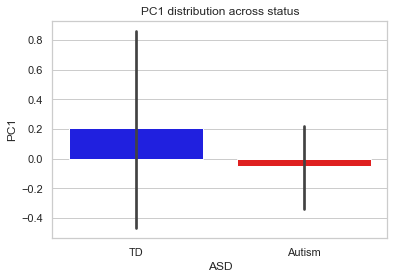

In [75]:
sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_pc1, x = 'ASD', y = 'PC1',
           palette = ['blue', 'red']
#             , scale = 'count', inner = 'box'
           )

plt.title('PC1 distribution across status')

## Plot loadings onto brain maps

In [80]:
brain_maps(pd.DataFrame(loadings)[0])

In [ ]:
brain_maps(pd.DataFrame(loadings)[1])